# Big Mart Sales III Analysis

Predictions from this analysis is at 197th (out of 1488) Position:
    [Big Mart Sales Leaderboard](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/lb?page=1)
    - Gradient Boosting Regression Algorithm: n_estimator = 50, random_state = 359 
    - Modelling Accuracy: 989.0451317473423
    - Competition Testing Accuracy: 1149.05893503744
    - Train_Test_Split: test_size= 0.05
    

#### List of Researchers

Shamar Morgan (B.Eng)<br>
Email: bromantkd@gmail.com <br>
Github: [shamar1234](https://github.com/shamar1234) <br>
Kaggle: [smorgan](https://www.kaggle.com/broman) <br>
Twitter: [@sham_morgan](https://twitter.com/Sham_Morgan) <br>

## Introduction
Big Mart is a chain of stores in several different locations in the United States where they sell a variety of products. They desire to increase sales of these products using predictive analysis. 

Big Mart wants to try to figure out the properties of the items and Outlets that allow for successful sales. They have provided some datasets containing the attributes of each product and store that have been defined. Their aim is to build a predictive model and find out the the sales of each product at a particular store.

#### Data Features: 
    Item_Identifier: Unique product ID
    Item_Weight: Weight of product
    Item_Fat_Content: Whether the product is low fat or not.
    Item_Visibility: The % of total display area of all products in a store allocated to  the particular product
    Item_Type: The category to which the product belongs
    Item_MRP: Maximum Retail Price (list price) of the product
    Outlet_Identifier: Unique store ID
    Outlet_Establishment_Year: The year in which store was established
    Outlet_Size: The size of the store in terms of ground area covered
    Outlet_Location_Type: The type of city in which the store is located
    Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
    Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome  variable to be predicted.

## Hypothesis
__Outlet Theory__:
Large Outlets in more densely populated areas will have greater sales of all items.<br>
Outlets that have existed for a longer time have greater customer loyal and retention. 
The Supermarkets will attract more customers as opposed to grocery stores due to a wider variety of produtcs and usually cheaper bulk products. 

__Item Theory__: Products that are basic necessities and needs constant replenishing will have a higher sales. Products will greater visibility also show be purchased more as retail chains usually place products with higher sales in more visible areas. Most customers tend to be weight centric and will opt for low fat products once presented the opportunity. Product weight has no bearings on the purchase of products and sales due to pricing this highly subjective therefore should have little effect of sales of items. 

## Libraries
The libraries used in this research is as follows:

In [1]:
# Import important libraries

# Looking at Python Version
import sys 
print('Python version ' + sys.version)

# IPython is what you are using now to run the notebook
import IPython
print("IPython version: %6.6s" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:    %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "Scipy version:  %6.6s" % sp.__version__)

# Pandas makes working with data frames easier
import pandas as pd
print( "Pandas version:   %6.6s" % pd.__version__)

#sklearn is a library for machine learning algorithms
import sklearn
print( "Sklearn version:  %6.6s" % sklearn.__version__)

#Seaborn is used for create beautiful static plots
import seaborn as sb
print( "Seaborn version:  %6.6s" % sb.__version__)

# Matplotlib is used for creating quick plots
import matplotlib
import matplotlib.pyplot as plt

# time used for timing run times of algorithms
import time

# Matplotlib inline is used to contain graphs inside workbook
%matplotlib inline 
print( "Maplotlib version: %6.6s" % matplotlib.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
IPython version:  6.1.0
Numpy version:    1.14.2
Scipy version:  0.19.1
Pandas version:   0.20.3
Sklearn version:  0.19.1
Seaborn version:   0.8.0
Maplotlib version:  2.1.0


## External Dependencies

Data set for analysis can be found at : [Big Mart Sales Prediction](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

## Data Acquisition

Loading training dataset into workspace

In [2]:
# Acquiring dataset from local machine
location = r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\bigmart_train.csv"
location_test =r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\bigmart_test.csv"
# checks encoding of dataset
%run char_encode.py
encoder = char_encode(location)

#loading training & testing data
train = pd.read_csv(location,encoding=encoder)
test = pd.read_csv(location_test, encoding=encoder)

print ("\nTraining Sample:")
train.sample(8)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

Training Sample:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
345,DRI37,15.85,Low Fat,0.107765,Soft Drinks,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,703.0848
1320,FDM39,6.42,Low Fat,0.053554,Dairy,178.6002,OUT049,1999,Medium,Tier 1,Supermarket Type1,3582.0040
2311,FDR60,14.30,Low Fat,0.130390,Baking Goods,77.2328,OUT035,2004,Small,Tier 2,Supermarket Type1,231.6984
7256,DRJ39,20.25,Low Fat,0.036400,Dairy,219.3482,OUT045,2002,NaN,Tier 2,Supermarket Type1,8323.8316
961,FDZ56,16.25,Low Fat,0.025716,Fruits and Vegetables,168.1474,OUT013,1987,High,Tier 3,Supermarket Type1,1516.0266
5694,FDR44,6.11,Regular,0.102901,Fruits and Vegetables,128.4968,OUT035,2004,Small,Tier 2,Supermarket Type1,1435.4648
2508,FDL04,NaN,Low Fat,0.111381,Frozen Foods,106.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,2964.1416
6584,FDE17,20.10,Regular,0.000000,Frozen Foods,152.2366,OUT010,1998,NaN,Tier 3,Grocery Store,151.1366


##  Data Exploration

### Univariate Analysis

Looking through the general information on the dataset:

In [3]:
# Get the basic info on the data
print("General Train information: ")
train.info()
print("\nGeneral Test information: ")
test.info()

General Train information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB

General Test information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight  

Findings:
    - There are missing values in both the train and test dataset in the Item_Weight column and the Outlet_Size columns

__Cleaning up the data for analysis__

In [4]:
# Clean Outlet Size
# Use the mode Outlet Size for missing values
train_mode = train.Outlet_Size.mode()
test_mode = test.Outlet_Size.mode()

train.Outlet_Size = train.Outlet_Size.fillna(train_mode[0])
test.Outlet_Size = test.Outlet_Size.fillna(test_mode[0])
print("Outlet Size Missing: ", train.Outlet_Size.isnull().any())

# Clean Item Weight
# Use the median weight for missing values
train.Item_Weight = train.Item_Weight.fillna(np.nanmedian(train.Item_Weight))
test.Item_Weight = test.Item_Weight.fillna(np.nanmedian(test.Item_Weight))
print("Item Weight Missing: ", train.Item_Weight.isnull().any())

# Fix Fat Content variables
train.Item_Fat_Content = train.Item_Fat_Content.replace('LF','Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.replace('low fat','Low Fat')
train.Item_Fat_Content = train.Item_Fat_Content.replace('reg','Regular')

test.Item_Fat_Content = test.Item_Fat_Content.replace('LF','Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.replace('low fat','Low Fat')
test.Item_Fat_Content = test.Item_Fat_Content.replace('reg','Regular')


Outlet Size Missing:  False
Item Weight Missing:  False


In [5]:
# Export cleaned data to CSV file
location_3 = r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\bigmart_test_cleaned.csv"
test.to_csv(location_3, index=False)

In [6]:
# Generate the summary statistics excluding Year Established
train.drop('Outlet_Establishment_Year',axis=1).describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,2181.288914
std,4.22724,0.051598,62.275067,1706.499616
min,4.55500,0.000000,31.290000,33.290000
25%,9.31000,0.026989,93.826500,834.247400
50%,12.60000,0.053931,143.012800,1794.331000
75%,16.00000,0.094585,185.643700,3101.296400
max,21.35000,0.328391,266.888400,13086.964800


Findings:
    - Several items seem to have as low as 0% visibiliy and as high as 32.8%. 75% of the  item visibilities are <=0.09 which is less than 1% visibility. 
    - The lowest Item_Outlet_Sales is 33.2 with a very large range. 
    - The sales between 75% - 100% inter-quartile ranges is very steep compared to the    gradual increase in in the other ranges.

__Plotting Numeric Distributions__

Histogram Plots of numeric fields: 


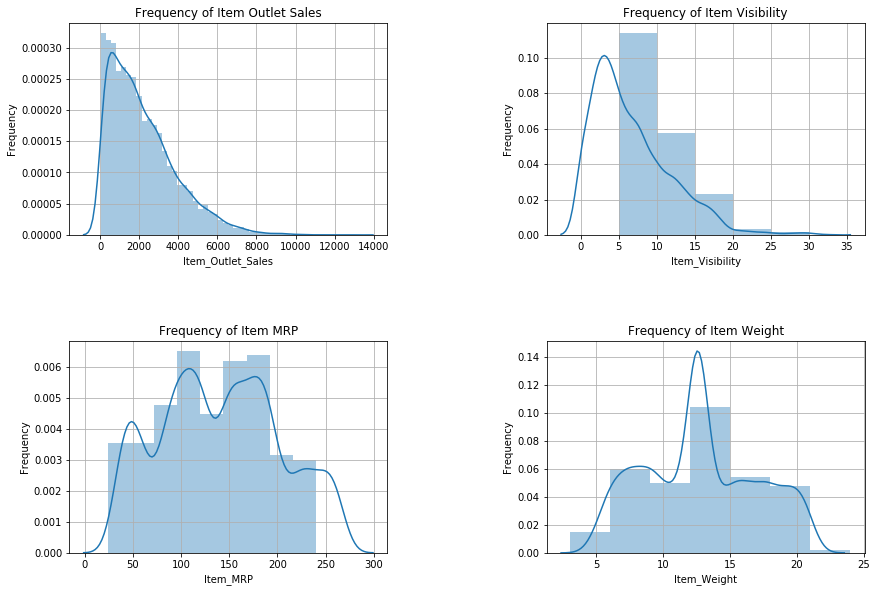

In [7]:
# plot with various axes scales
print("Histogram Plots of numeric fields: ")
plt.figure(figsize=(13,8))

plt.subplot(221)
sb.distplot(train.Item_Outlet_Sales)
plt.title('Frequency of Item Outlet Sales')
plt.ylabel('Frequency')
plt.xlabel('Item_Outlet_Sales')
plt.grid(True)

plt.subplot(222)
sb.distplot(train.Item_Visibility*100,bins=[5,10,15,20,25,30])
plt.title('Frequency of Item Visibility')
plt.ylabel('Frequency')
plt.xlabel('Item_Visibility')
plt.grid(True)

plt.subplot(223)
sb.distplot(train.Item_MRP, bins=[24,48,72, 96, 120, 144, 168,192,216, 240])
plt.title('Frequency of Item MRP')
plt.ylabel('Frequency')
plt.xlabel('Item_MRP')
plt.grid(True)

plt.subplot(224)
sb.distplot(train.Item_Weight, bins=[3,6,9,12,15,18,21,24])
plt.title('Frequency of Item Weight')
plt.ylabel('Frequency')
plt.xlabel('Item_Weight')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.5)

Findings:
    - The distribution of Item_Visibility and Item_Outlet_Sales are as follows from above. They are heavily skewed to the left showing a greater concentration of values in the left region. 
    - Item_Weight and Item_MRP are closer to a normal distribution thus having a more bell shaped curve with values spread out over the axes. 

__Plotting bargraphs of Categorical variables:__

Bar Plots of Categorical fields: 


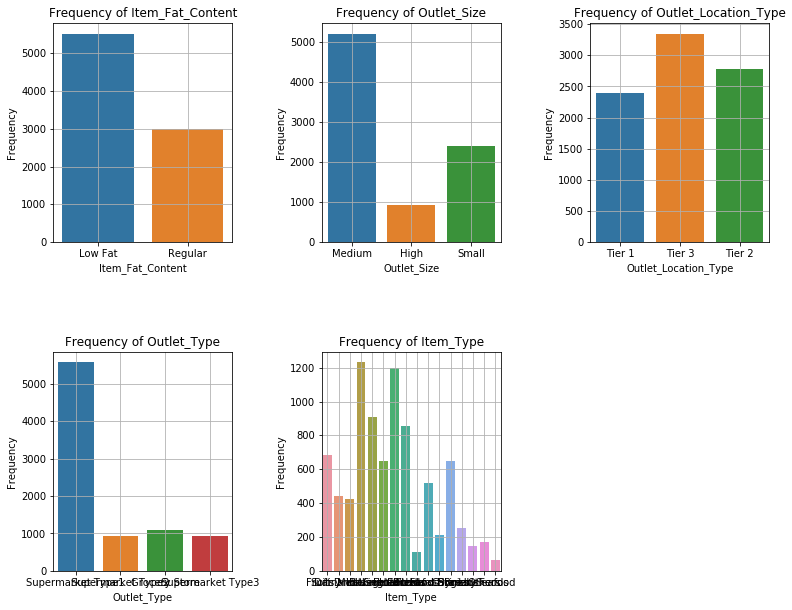

In [8]:
print("Bar Plots of Categorical fields: ")
plt.figure(figsize=(11.7, 8.27))

plt.subplot(231)
sb.countplot(data=train, x='Item_Fat_Content')
plt.title('Frequency of Item_Fat_Content')
plt.ylabel('Frequency')
plt.xlabel('Item_Fat_Content')
plt.grid(True)

plt.subplot(232)
sb.countplot(data=train, x='Outlet_Size')
plt.title('Frequency of Outlet_Size')
plt.ylabel('Frequency')
plt.xlabel('Outlet_Size')
plt.grid(True)

plt.subplot(233)
sb.countplot(data=train, x='Outlet_Location_Type')
plt.title('Frequency of Outlet_Location_Type')
plt.ylabel('Frequency')
plt.xlabel('Outlet_Location_Type')
plt.grid(True)

plt.subplot(234)
sb.countplot(data=train, x='Outlet_Type')
plt.title('Frequency of Outlet_Type')
plt.ylabel('Frequency')
plt.xlabel('Outlet_Type')
plt.grid(True)

plt.subplot(235)
sb.countplot(data=train, x='Item_Type')
plt.title('Frequency of Item_Type')
plt.ylabel('Frequency')
plt.xlabel('Item_Type')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.5)

Findings:
    - Low Fat products were more frequently purchased as opposed to the Regular products.
    - Most frequent purchases were Fruits & Vegetables, Snacks, Frozen Foods and            Household. Starchy Foods, Seafood, Others and Breakfast were unpopular for common   list of food categories.
    - The medium size outlets recorded more sales than the other sizes. SuperMarket Type1 had the greatest sales frequency and all other Outlet Sizes had approximately equal  sales frequency. 
    - Tier 3 had the greatest frequency of over 3400.


Average Amount of Items Purchased: 


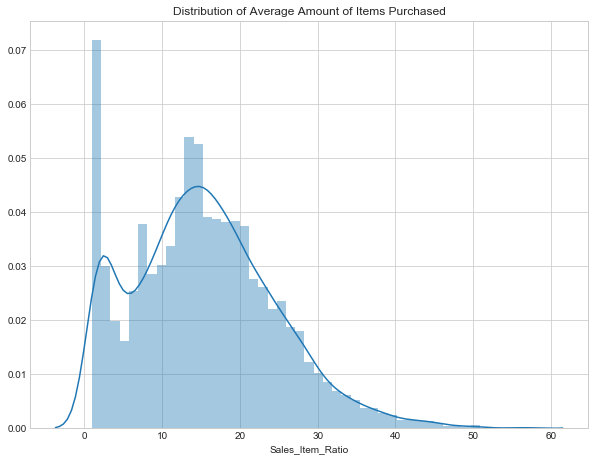

In [9]:
# finding number of items sold per line 
train['Sales_Item_Ratio'] = round(train['Item_Outlet_Sales']/train['Item_MRP'],1)

print('Average Amount of Items Purchased: ')
sb.set_style('whitegrid')
fig, ax = plt.subplots()
plt.title('Distribution of Average Amount of Items Purchased')
fig.set_size_inches(10, 7.5)
sb.distplot(train.Sales_Item_Ratio,ax=ax)

Findings:
    - The Sales to Price ratio gives the number of items sold.
    - The Distribution of the number of items sold over the period slightly left shewed   with mean of 15 units of item.

### Multivariate Analysis

#### Item Sales Investigations

In [10]:
#Test for linear relation with Sales
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Sales_Item_Ratio
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693,-0.011886
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625,-0.160985
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574,0.011173
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135,-0.074545
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000,0.759326
Sales_Item_Ratio,-0.011886,-0.160985,0.011173,-0.074545,0.759326,1.000000


Findings:
    - Item MRP shows a moderately positive linear relationship with Item_Outlet_Sales

In [11]:
# Use Chi Squared Test to find differences in item variables and sales.
fields =['Item_Type']

print('Applying Chi Squared on Item Type vs Sales: \n')
for field in fields:
    contingencyTable = pd.crosstab(train['Item_Outlet_Sales'],train[field])
    chi2, p, dof, expected = sp.stats.chi2_contingency(contingencyTable)
    
    if p <= 0.05:
        print(field)
        print('P-Value:',p)
        print('Statistically significant association exist!')   
    print('\n')

Applying Chi Squared on Item Type vs Sales: 

Item_Type
P-Value: 1.0335983028373673e-28
Statistically significant association exist!




Findings:
    - All item types has an impact on the Item_Outlet_Sales

Average Number of Products Sold: 


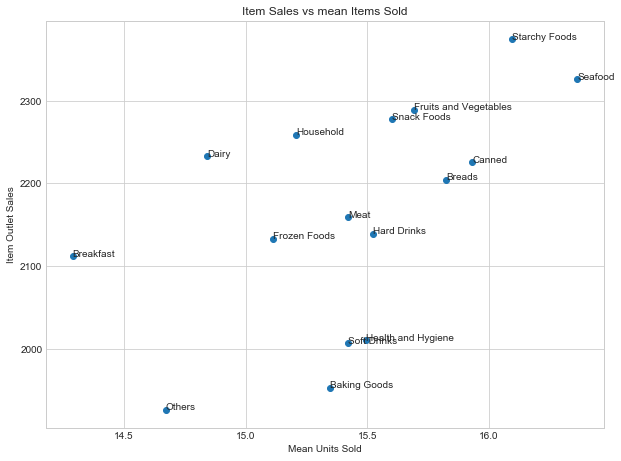

In [12]:
print("Average Number of Products Sold: ")
by_Item = train.groupby('Item_Type')

vals = ['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']

fig, ax = plt.subplots()
plt.title('Item Sales vs mean Items Sold')
plt.xlabel('Mean Units Sold')
plt.ylabel('Item Outlet Sales')
fig.set_size_inches(10, 7.5)
plt.scatter(x=by_Item.Sales_Item_Ratio.mean(), y=by_Item.Item_Outlet_Sales.mean())
for i, txt in enumerate(vals):
    ax.annotate(txt, (by_Item.Sales_Item_Ratio.mean()[i],by_Item.Item_Outlet_Sales.mean()[i]))

Findings:
    - More  and  were sold than any other category of item.
    - Seafood, Breakfast, Starchy Foods, Fruit & Vegetable, Snack Foods & Household were  most sold in volume.

Average % Visibility by Product: 


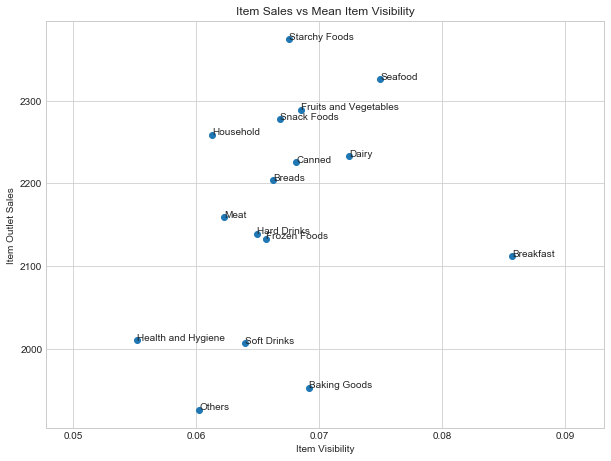

In [13]:
print("Average % Visibility by Product: ")
z = by_Item.Item_Visibility.mean()
fig, ax = plt.subplots()
plt.title('Item Sales vs Mean Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
fig.set_size_inches(10, 7.5)
plt.scatter(x=z, y=by_Item.Item_Outlet_Sales.mean())
for i, txt in enumerate(vals):
    ax.annotate(txt, (z[i],by_Item.Item_Outlet_Sales.mean()[i]))

Findings:
    - Similarly the item sales increases when the aggregated item visibility increases.
    - Breakfast, Seafood and Dairy were the most visible items in stores.

Item Sales to Item Weight: 


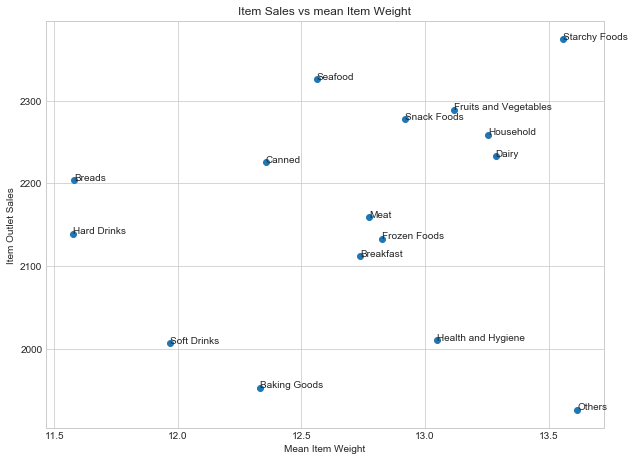

In [14]:
print('Item Sales to Item Weight: ')
fig, ax = plt.subplots()
plt.title('Item Sales vs mean Item Weight')
plt.xlabel('Mean Item Weight')
plt.ylabel('Item Outlet Sales')
fig.set_size_inches(10, 7.5)
plt.scatter(x=by_Item.Item_Weight.mean(), y=by_Item.Item_Outlet_Sales.mean())
for i, txt in enumerate(vals):
    ax.annotate(txt, (by_Item.Item_Weight.mean()[i],by_Item.Item_Outlet_Sales.mean()[i]))

12Findings:
    - Starchy foods were the 2nd heaviest sets of items and generated the most mean sales while Others is the heaviest with the lowest mean sales.
    - The mean item weights are all between 11 - 14

#### Outlet Sales Investigation

In [15]:
outlets =['Outlet_Type','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year']
print("Average Sales by: ")

for outlet in outlets:
    print('\n')
    by_Item = train.groupby(outlet)
    print(by_Item.Item_Outlet_Sales.sum())

Average Sales by: 


Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64


Outlet_Size
High      2.142664e+06
Medium    1.188225e+07
Small     4.566212e+06
Name: Item_Outlet_Sales, dtype: float64


Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64


Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64


Findings:
    - Type1 Supermarkets recorded the highest sales with a magnitude 10x the others.
    - Type3 Supermarkets performed second best
    - Medium sized Outlets also recorded the highest sales with a 10x magnitude.
    - Tier 3 recorded the greatest sales
    - Establishment in 1998 surprizingly had the lowest sales 
    - The Oldest Establishment (1985) recorded the greatest sale over the period.

In [16]:
# Two-way chisquare test for the relationship between variables
fields =['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year']


print('Applying Chi Squared on Outlet Variables vs Sales (95% Confidence Level): ')
for field in fields:
    contingencyTable = pd.crosstab(train['Item_Outlet_Sales'],train[field])
    chi2, p, dof, expected = sp.stats.chi2_contingency(contingencyTable)
    
    if p <= 0.05:
        print('\n')
        print(field)
        print('P-Value:',p)
        print('Statistically significant association exist!')   

Applying Chi Squared on Outlet Variables vs Sales (95% Confidence Level): 


Outlet_Type
P-Value: 3.4371967318312466e-121
Statistically significant association exist!


Outlet_Location_Type
P-Value: 0.035581810296713895
Statistically significant association exist!


Outlet_Establishment_Year
P-Value: 3.8385761155747724e-08
Statistically significant association exist!


Findings:
    - Outlet size has no effect on Item_Outlet_Sales
    - All other Outlet variables have an effect on Sales

Barplot of Sales per Outlet Location Type arranged by Outlet Type:


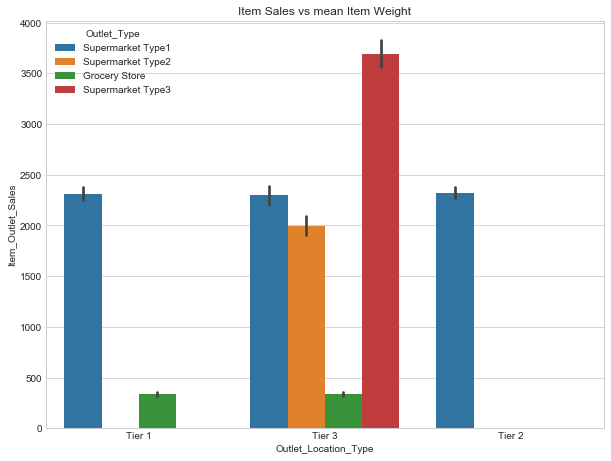

In [17]:
print('Barplot of Sales per Outlet Location Type arranged by Outlet Type:')

fig, ax = plt.subplots()
plt.title('Item Sales vs mean Item Weight')
fig.set_size_inches(10, 7.5)
sb.barplot(hue='Outlet_Type', y='Item_Outlet_Sales', data=train, x='Outlet_Location_Type')

Findings:
    - In Tier 1 & Tier2, Type1 Supermarkets are the top performers. 
    - Tier3 has Type3 Supermarkets as the top performer with Type1 in second. 
    - Tier3 has sales in all Outlet types.

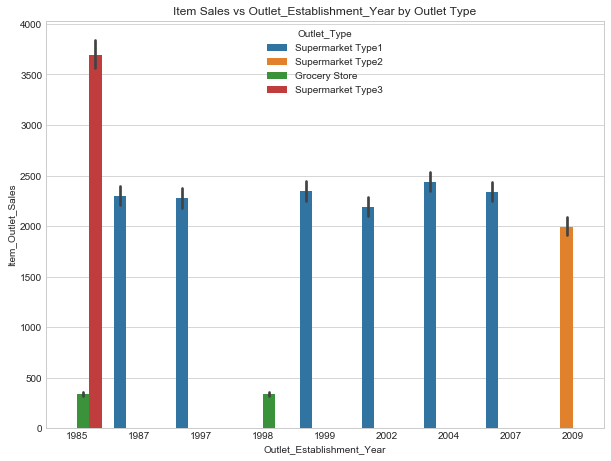

In [18]:
# Establishment 
fig, ax = plt.subplots()
plt.title('Item Sales vs Outlet_Establishment_Year by Outlet Type')
fig.set_size_inches(10, 7.5)
sb.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train, hue='Outlet_Type')

Findings:
    - More Supermarkets Type1 were established than any other store.
    - The only sales generating Type3 Supermarket was established in 1985.
    - Type2 Supermarkets were established in 2009.
    - Grocery stores were also established as early as 1985.

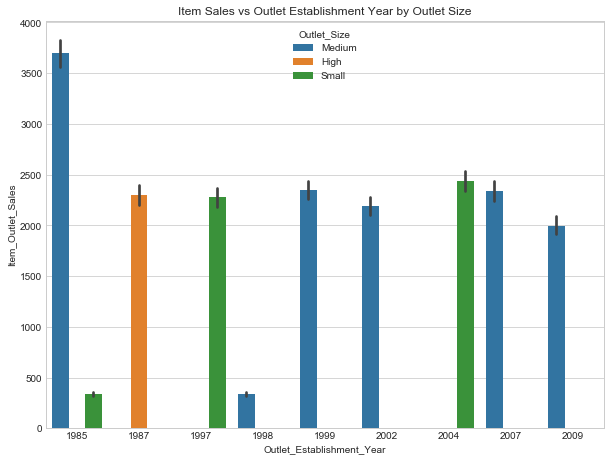

In [19]:
fig, ax = plt.subplots()
plt.title('Item Sales vs Outlet Establishment Year by Outlet Size')
fig.set_size_inches(10, 7.5)
sb.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train, hue='Outlet_Size')

Findings:
    - Medium sized Outlets are more prevalent and is one of the oldest stores established.
    - The high sized sales generating outlets were established in 1987.
    - The 2nd most prevalent store size are small being established as far back as 1985.

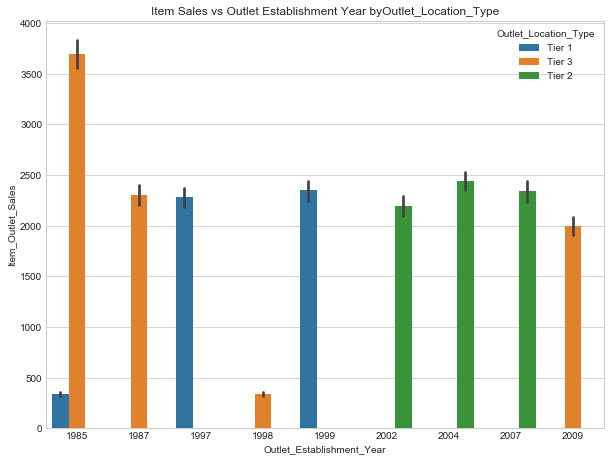

In [20]:
fig, ax = plt.subplots()
plt.title('Item Sales vs Outlet Establishment Year byOutlet_Location_Type')
fig.set_size_inches(10, 7.5)
sb.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train, hue='Outlet_Location_Type')

Findings:
    - Tier1 & Tier3 were the first to be established.
    - Tier3 in the oldest outlets were the greatest sales earners.
    - Tier2 Outlets were established as of 2002.

## Conclusion

    It can be concluded that the Item Properties useful in the following ranges:
    Visibility between range 0.6 - 0.8, Item Weight between 12.5 -13,5 and mean sales     between 2200 - 2300. The five (5) most purchased items were Fruits & Vegetables,     Snacks, Frozen Fruits and Household while Seafood, Breakfast and Others were the     least in sales. The Chi Squared test also showed that there is the all the different features had differed impact on the item outlet sales.
    
    It can also be concluded that Outlet type properties such as Supermarket Type1 are the largest sales by volume as this type generate high sales in all areas/tiers as more  Type1 Supermarkets are present. Outlets regardless of year of establishment generally generate similar sales revenue with the only outliers being the outlets establishment created in 1998 which has the lowest sales for the period due to only a grocery store being established generating sales and 1985 that generated the highest sales revenue with a high sales Type3 Supermarket and a grocery store. Medium sized outlets are    also most frequent and oldest thus having the greatest sales revenue. Chi Squared     test showed that Outlet Size do not impact the sales revenue. Tier 3 locations have a composition of all outlet types thus would lead to Tier3 locations having the        greatest sales revenues. 

# Big Mart Sales III Prediction 

## Feature Engineering

### Variable Transformation

In [21]:
# Normalizing Item MRP
print('Normalizing the Item_MRP field....')
from sklearn import preprocessing
x = train[['Item_MRP']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
train['Normalized'] = pd.DataFrame(x_scaled) 
print('Normalization Complete!')

Normalizing the Item_MRP field....
Normalization Complete!


In [22]:
# Defining X and y variables and tranforming X values to sklearn friendly format
print('Transforming features and labels....')
y = np.array(train.Item_Outlet_Sales)
new_train =train.drop(['Sales_Item_Ratio','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

train_selected = new_train.drop(['Item_MRP','Outlet_Size','Item_Weight','Outlet_Establishment_Year','Outlet_Location_Type','Item_Visibility','Item_Fat_Content'], axis = 1)
X= train_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()
print('Transformation completed, X shape: {} and Y shape {}'.format(X.shape,y.shape) )


Transforming features and labels....
Transformation completed, X shape: (8523, 21) and Y shape (8523,)


### Variable Creation

    - No derivative features were created

## Model Development

    - In progress

### Cross Validation

Spliting the data into training and testing 

In [200]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("The data has been split using 80% for training and 20% for testing")
print("Train Shape: {}, Test Shape: {}".format(X_train.shape,X_test.shape))
print("Memory Storage Costs Train: {} MB, Test: {} MB ".format((X_train.size * X_train.dtype.itemsize)/1000000, (X_test.size * X_test.dtype.itemsize)/1000000))

The data has been split using 80% for training and 20% for testing
Train Shape: (6818, 21), Test Shape: (1705, 21)
Memory Storage Costs Train: 1.145424 MB, Test: 0.28644 MB 


### Model Exploration

In [24]:
# Load all necessary modules needed
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.neural_network import MLPRegressor as NNR
from sklearn.linear_model import BayesianRidge as BR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
# Testing Gradient Boosting Regression Model

print ("Gradient Boosting Regression:")
model= GBR()
start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
start_time = time.time()
predicted = model.predict(X_test)
elapsed2_time = time.time() - start_time
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Fit Run Time: {}'.format(elapsed_time))
print('Prediction Run Time: {}'.format(elapsed2_time))

Gradient Boosting Regression:
RMS Evaluation:  1122.8900767785913
Fit Run Time: 0.45919299125671387
Prediction Run Time: 0.0020079612731933594


In [26]:
# Testing Linear Regression Model

print ("Linear Regression:")
model= LNR()
start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
start_time = time.time()
predicted = model.predict(X_test)
elapsed2_time = time.time() - start_time
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Fit Run Time: {}'.format(elapsed_time))
print('Prediction Run Time: {}'.format(elapsed2_time))

Linear Regression:
RMS Evaluation:  1176.5037251734236
Fit Run Time: 0.18045520782470703
Prediction Run Time: 0.0010018348693847656


In [27]:
# Testing Random Forest Regression

print ("Random Forest Regression:")
model= RFR()
start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
start_time = time.time()
predicted = model.predict(X_test)
elapsed2_time = time.time() - start_time
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Fit Run Time: {}'.format(elapsed_time))
print('Prediction Run Time: {}'.format(elapsed2_time))

Random Forest Regression:
RMS Evaluation:  1278.8590040488168
Fit Run Time: 0.2185816764831543
Prediction Run Time: 0.007025003433227539


In [28]:
# Testing Decision Tree Regression
print ("Decision Tree Regression:")
model= DTR()
start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
start_time = time.time()
predicted = model.predict(X_test)
elapsed2_time = time.time() - start_time
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Fit Run Time: {}'.format(elapsed_time))
print('Prediction Run Time: {}'.format(elapsed2_time))

Decision Tree Regression:
RMS Evaluation:  1539.2288820323736
Fit Run Time: 0.0320887565612793
Prediction Run Time: 0.0010221004486083984


In [29]:
# Testing the Bayesian Bridge Model 

print ("Bayesian Ridge:")
model= BR()
start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
start_time = time.time()
predicted = model.predict(X_test)
elapsed2_time = time.time() - start_time
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Fit Run Time: {}'.format(elapsed_time))
print('Prediction Run Time: {}'.format(elapsed2_time))

Bayesian Ridge:
RMS Evaluation:  1176.1353282410337
Fit Run Time: 0.00902247428894043
Prediction Run Time: 0.0


In [30]:
# Testing multilayer Perceptron Regression

print ("Neutral Network Regression:")
model= NNR()
start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
start_time = time.time()
predicted = model.predict(X_test)
elapsed2_time = time.time() - start_time
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Fit Run Time: {}'.format(elapsed_time))
print('Prediction Run Time: {}'.format(elapsed2_time))

Neutral Network Regression:
RMS Evaluation:  1229.1648412003958
Fit Run Time: 5.037031888961792
Prediction Run Time: 0.003010988235473633


C:\Users\Latoya Clarke\Anaconda3-5\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Model Selection

The best performing model was Gradient Boosting Regession:
    - Training Data Size: 8182 records
    - Memory Storage Costs Train: 1.374576 MB 
    - Fitting Time: 0.7352519035339355
    - Prediction Time: 0.0
    - RMS Evaluation: 1032.6091742830586

In [201]:
print ("Gradient Boosting Regression:")
model= GBR()
model.fit(X_train, y_train)
model_score = model.score(X_train, y_train)
predicted = model.predict(X_test)
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )
print('Model Score:  {}'.format(model_score) )

Gradient Boosting Regression:
RMS Evaluation:  1107.8551632124997
Model Score:  0.6353470862250836


### Model Cross Validation Scoring

In [197]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=2, scoring = 'neg_mean_squared_error')
print("RMSE : %0.2f (+/- %0.2f)" % (sqrt(-1*scores.mean()), sqrt(scores.std() * 2)))

RMSE : 1093.04 (+/- 109.99)


### Model Optimization

In [205]:
# 247, 359, 620, 1166, 1924
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": [50],               
                    "random_state": [247, 359, 620, 1166, 1924]
         } 
grid = GridSearchCV(estimator=model,                      
                    param_grid=params) 
grid.fit(X_train, y_train) 
print(grid.best_params_)

{'n_estimators': 50, 'random_state': 247}


### Model Evaluation

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

print ("\nGradient Boosting Regression:")
model= GBR(n_estimators =50, random_state= 359)
model.fit(X_train, y_train)
model_score = model.score(X_train, y_train)
predicted = model.predict(X_test)
rms = sqrt(mean_squared_error(y_test, predicted))
print('RMS Evaluation:  {}'.format(rms) )


Gradient Boosting Regression:
RMS Evaluation:  978.8109465948022


### Model Finalization

    - In progress

### Exporting Predictions

In [300]:
# Read and Transform variables for testing
print('Loading in the test dataset...')
test = pd.read_csv(r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\bigmart_test_cleaned.csv")
test.sample(4)

Loading in the test dataset...


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
342,FDN20,19.350,Low Fat,0.026223,Fruits and Vegetables,169.0474,OUT049,1999,Medium,Tier 1,Supermarket Type1
377,FDQ12,12.650,Low Fat,0.059270,Baking Goods,229.1010,OUT010,1998,Medium,Tier 3,Grocery Store
3897,FDP40,4.555,Regular,0.034552,Frozen Foods,112.5544,OUT017,2007,Medium,Tier 2,Supermarket Type1
622,FDU22,12.350,Low Fat,0.093486,Snack Foods,119.6124,OUT045,2002,Medium,Tier 2,Supermarket Type1


In [301]:
print("\nTransforming data......")
from sklearn import preprocessing
x = test[['Item_MRP']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
test['Normalized'] = pd.DataFrame(x_scaled) 

new_test =test.drop(['Item_Identifier','Outlet_Identifier',],axis=1)

test_selected = new_test.drop(['Item_MRP','Outlet_Size','Item_Weight','Outlet_Establishment_Year','Outlet_Location_Type','Item_Visibility','Item_Fat_Content'], axis = 1)
X_2= test_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
test_X = vec.fit_transform(X_2).toarray()

print('\nTest features (X) before: ')
print(test_selected.sample(3))
print('\nTest features (X) after: ')
print(test_X[3])

print('\nPredicting from Testing Data....')
pred_y = model.predict(test_X)
print('\nValues Predicted: ',pred_y)


Transforming data......

Test features (X) before: 
         Item_Type        Outlet_Type  Normalized
5219   Snack Foods  Supermarket Type1    0.668375
670      Breakfast  Supermarket Type1    0.026675
1006  Frozen Foods  Supermarket Type1    0.676587

Test features (X) after: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.52448781 0.
 1.         0.         0.        ]

Predicting from Testing Data....

Values Predicted:  [1662.09025062 1382.67766572  630.32240328 ... 1901.50751233 3519.81190294
 1319.29747796]


Export to CSV

In [302]:
print('Exporting Predicted data to file...')
test['Item_Outlet_Sales'] = pred_y
test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv(r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\bigmart_predictions.csv", index=False)
print('Exported predicted data to file "bigmart_predictions.csv"')

Exporting Predicted data to file...
Exported predicted data to file "bigmart_predictions.csv"
